# Quickstart: NOAA GFS analysis - dynamical.org Icechunk Zarr
A brief introduction to the NOAA GFS analysis dataset transformed into an analysis-ready, cloud-optimized format by dynamical.org.

Dataset documentation: https://dynamical.org/catalog/noaa-gfs-analysis/

In [ ]:
# If running locally, follow README.md for simple dependency installation.
# If using Google Colab, run this cell and then restart the notebook.
%pip install "xarray[complete]>=2025.1.2" "zarr>=3.0.8" icechunk

In [1]:
import icechunk
import xarray as xr

storage = icechunk.s3_storage(bucket="dynamical-noaa-gfs", prefix="noaa-gfs-analysis/v0.1.0.icechunk/", region="us-west-2", anonymous=True)
repo = icechunk.Repository.open(storage)
session = repo.readonly_session("main")
ds = xr.open_zarr(session.store, chunks=None)
ds

<xarray.Dataset> Size: 4TB
Dimensions:                                     (time: 41823, latitude: 721,
                                                 longitude: 1440)
Coordinates:
  * latitude                                    (latitude) float64 6kB 90.0 ....
  * longitude                                   (longitude) float64 12kB -180...
    spatial_ref                                 int64 8B ...
  * time                                        (time) datetime64[ns] 335kB 2...
Data variables: (12/21)
    categorical_freezing_rain_surface           (time, latitude, longitude) float32 174GB ...
    categorical_ice_pellets_surface             (time, latitude, longitude) float32 174GB ...
    categorical_rain_surface                    (time, latitude, longitude) float32 174GB ...
    categorical_snow_surface                    (time, latitude, longitude) float32 174GB ...
    downward_long_wave_radiation_flux_surface   (time, latitude, longitude) float32 174GB ...
    downward_short_wave_radiation_flux_surface  (time, latitude, longitude) float32 174GB ...
    ...                                          ...
    temperature_2m                              (time, latitude, longitude) float32 174GB ...
    total_cloud_cover_atmosphere                (time, latitude, longitude) float32 174GB ...
    wind_u_100m                                 (time, latitude, longitude) float32 174GB ...
    wind_u_10m                                  (time, latitude, longitude) float32 174GB ...
    wind_v_100m                                 (time, latitude, longitude) float32 174GB ...
    wind_v_10m                                  (time, latitude, longitude) float32 174GB ...
Attributes:
    dataset_id:          noaa-gfs-analysis
    dataset_version:     0.1.0
    name:                NOAA GFS analysis
    description:         Weather analysis from the Global Forecast System (GF...
    attribution:         NOAA NWS NCEP GFS data processed by dynamical.org fr...
    spatial_domain:      Global
    spatial_resolution:  0.25 degrees (~20km)
    time_domain:         2021-05-01 00:00:00 UTC to Present
    time_resolution:     1 hour

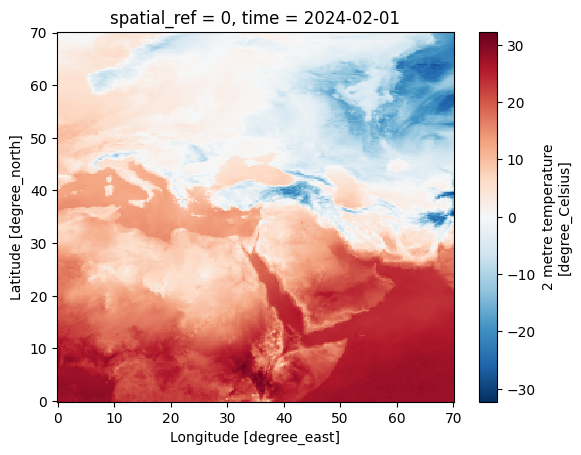

In [2]:
ds["temperature_2m"].sel(
    time="2024-02-01T00:00",
    latitude=slice(70, 0),
    longitude=slice(0, 70),
).plot()

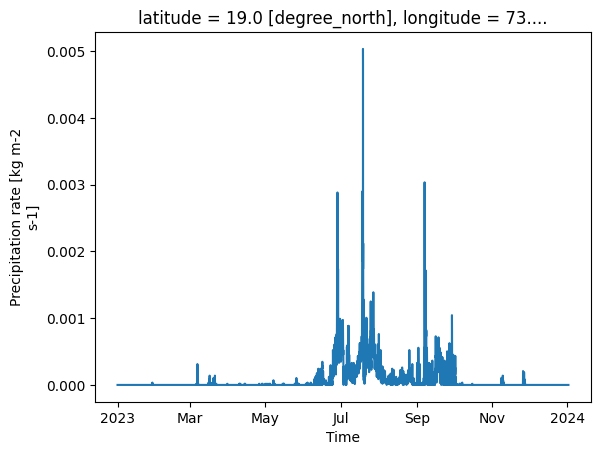

In [3]:
(
    ds["precipitation_surface"]
    .sel(latitude=19.1, longitude=72.9, method="nearest")  # Mumbai, India
    .sel(time=slice("2023-01-01", "2024-01-01"))
    .plot()
)
# Hello, monsoon season!

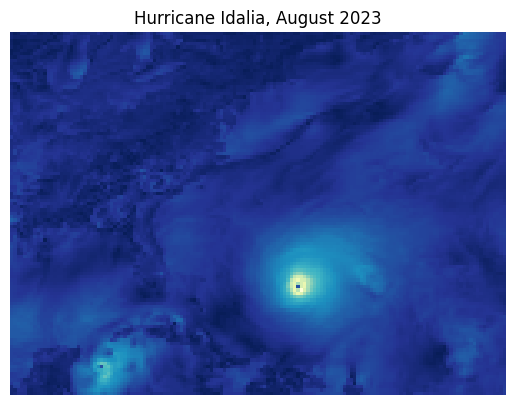

In [4]:
# Run this cell yourself to create an interactive animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

plot_ds = (
    ds[["wind_u_10m", "wind_v_10m"]]
    .sel(
        time=slice("2023-08-28T00", "2023-09-01"),
        latitude=slice(45, 18),
        longitude=slice(-92, -55),
    )
    .load()
)

wind_speed = np.sqrt(plot_ds["wind_u_10m"] ** 2 + plot_ds["wind_v_10m"] ** 2)

fig, ax = plt.subplots()
ax.set_title("Hurricane Idalia, August 2023")
ax.axis("off")

img = ax.imshow(wind_speed.isel(time=0), cmap="YlGnBu_r")
anim = FuncAnimation(
    fig=fig, frames=wind_speed, func=lambda frame: img.set_data(frame), interval=60
)

HTML(anim.to_jshtml())